
1. You are provided the titanic dataset. Load the dataset and perform splitting into training and test sets with 70:30 ratio randomly using test train split.
2. Use the Logistic regression created from scratch (from the prev question) in this question as well.
3. Data cleaning plays a major role in this question. Report all the methods used by you in the ipynb.

--> 

i. Check for missing values

ii. Drop Columns & Handle missing values

iii. Create dummies for categorical features

you are free to perform other data cleaning to improve your results.



4. Report accuracy score, Confusion matrix, heat map, classifiaction report and any other metrics you feel useful.

dataset link : 
https://iiitaphyd-my.sharepoint.com/:f:/g/personal/apurva_jadhav_students_iiit_ac_in/Eictt5_qmoxNqezgQQiMWeIBph4sxlfA6jWAJNPnV2SF9Q?e=mQmYN0 

(titanic.csv)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
df= pd.read_excel('titanic.xlsx')
df = df.reset_index(drop=True)




In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.478305,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.549691,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Total columns
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# Count missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object


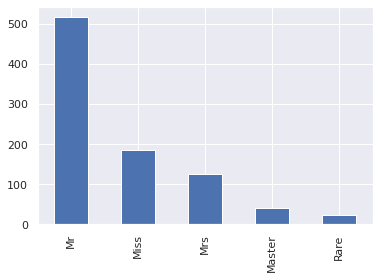

In [ ]:
# //Handling name fiele.Extracting columns title and assigning numerical categroies
print(df['Name'].head(10))
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df = df.drop(columns='Name')
df.Title
df.Title.value_counts().plot.bar()
df['Title'] = df['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Don'], 'Rare')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')
df['Title'] = df['Title'].replace('Mlle', 'Miss')

df.Title.value_counts().plot.bar()

df.groupby('Title').agg({'Survived':['count', 'sum','mean']})
df['Title'] = df['Title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5})


In [ ]:
# Handling sex field.
# Female are more likely to survive based on mean (which is percentage here as survived count)
print(df.groupby('Sex').agg({'Survived':['count', 'sum','mean']}))
df['Sex'] = df['Sex'].map({'male':0, 'female':1})

       Survived               
          count  sum      mean
Sex                           
female      314  233  0.742038
male        577  109  0.188908


In [ ]:
print(df['Embarked'].describe())
# Handling Embarked field.
# C are more likely to survive followed by Q ,followed by S

print(df.groupby('Embarked').agg({'Survived':['count', 'sum','mean']}))
# print(df.groupby('Embarked').agg({'Survived':['count', 'sum','mean']}))
# As s is the majority class, fill the missing value with S

df['Embarked'] = df['Embarked'].fillna('S')
df['Embarked'] = df['Embarked'].map({'C':0, 'Q':1, 'S':2})

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object
         Survived               
            count  sum      mean
Embarked                        
C             168   93  0.553571
Q              77   30  0.389610
S             644  217  0.336957


In [ ]:
# SibSp and Parch
# The passengers having one sibling/spouse has more survival probability.
# '1' > '2' > '0' > '3' > '4'

# # The passengers having three children/parents has more survival probability.
#     '3' > '1' > '2' > '0' > '5'



# Create new feature as a sum of siblings and children
# train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
print(df.groupby('SibSp').agg({'Survived':['count', 'sum','mean']}))
print(df.groupby('Parch').agg({'Survived':['count', 'sum','mean']}))
df['SizeOfToalFamily'] = df['SibSp'] + df['Parch'] + 1

      Survived               
         count  sum      mean
SibSp                        
0          608  210  0.345395
1          209  112  0.535885
2           28   13  0.464286
3           16    4  0.250000
4           18    3  0.166667
5            5    0  0.000000
8            7    0  0.000000
      Survived               
         count  sum      mean
Parch                        
0          678  233  0.343658
1          118   65  0.550847
2           80   40  0.500000
3            5    3  0.600000
4            4    0  0.000000
5            5    1  0.200000
6            1    0  0.000000


       Survived               
          count  sum      mean
Pclass                        
1           216  136  0.629630
2           184   87  0.472826
3           491  119  0.242363


Text(0, 0.5, 'Survival Probability')

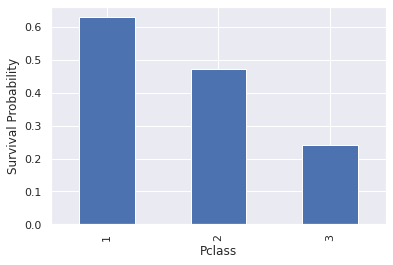

In [ ]:
# Pclass
# survival probability 1>2>3
print(df.groupby('Pclass').agg({'Survived':['count', 'sum','mean']}))
plt = df[['Pclass', 'Survived']].groupby('Pclass').mean().Survived.plot.bar()
plt.set_xlabel('Pclass')
plt.set_ylabel('Survival Probability')

In [ ]:
print(df['Ticket'].describe())
df = df.drop(columns=['Ticket'])
# As there are 681 unique value, its good to drop it
# As cabins have lot of missing values
df = df.drop(columns=['PassengerId'])
df = df.drop(columns=['Cabin'])



count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: int64


In [ ]:
    print(df.isnull().sum())
    mean = df["Age"].mean()
    std = df["Age"].std()
    no_of_null = df["Age"].isnull().sum()
    # compute no_of_null random numbers  array of size no_of_null between the mean, std
    rand_age = np.random.randint(mean - std, mean + std, size = no_of_null)
    # fill NaN values in Age column with random values generated
    age_slice = df["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    df["Age"] = age_slice


Survived              0
Pclass                0
Sex                   0
Age                 177
SibSp                 0
Parch                 0
Fare                  0
Embarked              0
Title                 0
SizeOfToalFamily      0
dtype: int64


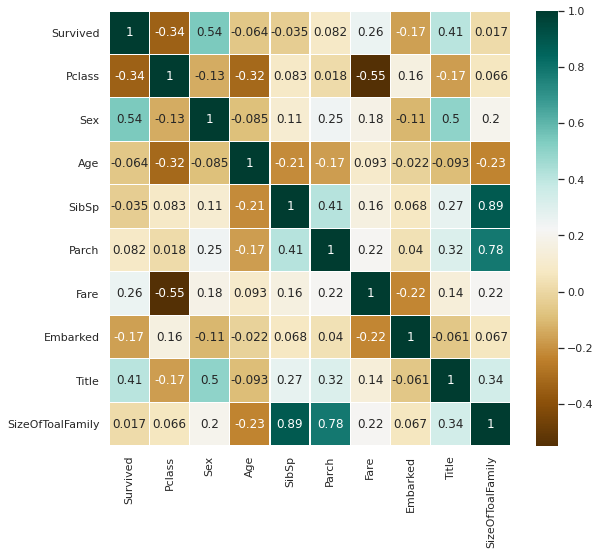

In [ ]:
# Heat map 
import matplotlib.pyplot as plt
corr_matrix = df.corr()   
plt.figure(figsize=(9, 8))
sns.heatmap(data = corr_matrix,cmap='BrBG', annot=True, linewidths=0.2)


In [ ]:
X = df.drop("Survived", axis=1)
Y = df["Survived"]
pd.DataFrame(X).to_numpy()
pd.DataFrame(Y).to_numpy()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)


In [ ]:
import numpy as np


class LogisticRegression:

    def __init__(self, learning_rate=0.01, iters=30000):
        self.learning_rate = learning_rate
        self.iters = iters

    
    def fit(self, X, y):
        no_of_samples, no_of_features = X.shape 
        weights = np.zeros(no_of_features)
        b = 0
        for i in range(self.iters):
            # linear function
            temp = np.dot(X, weights) +b
            # sigmoid function
            y_pred = 1 / (1 + np.exp(-temp))

            # gradients calculation
            dw = (1 / no_of_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / no_of_samples) * np.sum(y_pred - y)

            # update parameters
            weights -= self.learning_rate * dw
            b-=        self.learning_rate * db

      
        self.weights = weights
        self.b = b
    def predict(self, X):
        temp = np.dot(X, self.weights) + self.b
        y_pred = 1 / (1 + np.exp(-temp))
        return y_pred
        # y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        # return np.array(y_predicted_cls)
    def classify(self, X):
        temp = np.dot(X, self.weights) + self.b
        y_pred = 1 / (1 + np.exp(-temp))
        y_pred = [1 if i > 0.5 else 0 for i in y_pred]
        return np.array(y_pred)

[1 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1
 1 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 1
 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0
 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 0 0 0
 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1
 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1
 1 0 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1
 0 0 0 0 0 0 1 0 0]
0.7798507462686567


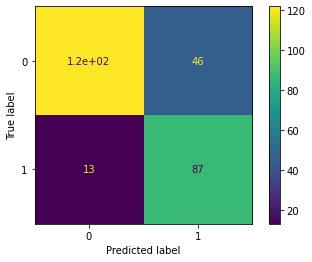

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred = logreg.classify(X_test)
print(Y_pred)

print(accuracy_score(y_test, Y_pred))

cm=confusion_matrix(y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
disp.plot() 
# acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, Y_pred, target_names=target_names))

In [ ]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, Y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.90      0.73      0.81       168
     class 1       0.65      0.87      0.75       100

    accuracy                           0.78       268
   macro avg       0.78      0.80      0.78       268
weighted avg       0.81      0.78      0.78       268

